In [20]:
import pandas as pd
import matplotlib.pyplot as plt # for Visualization
import seaborn as sns # UI yang lebih bagus tapi diatas matplotlib

df_text = pd.read_csv("../csv/jago_preprocessing.csv")

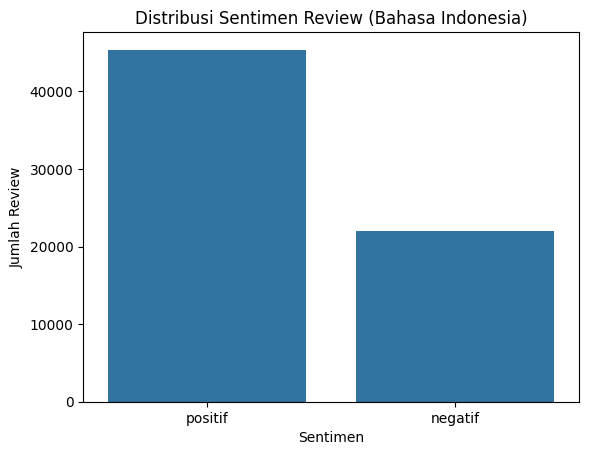

In [21]:
sns.countplot(data=df_text, x="sentiment")
plt.title("Distribusi Sentimen Review (Bahasa Indonesia)")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Review")
plt.show()

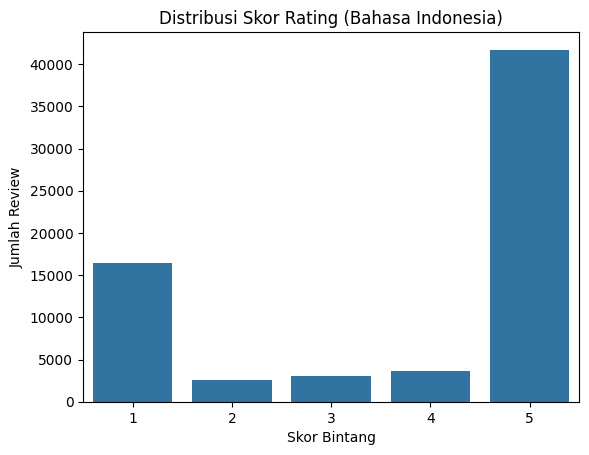

In [22]:
sns.countplot(data=df_text, x="score")
plt.title("Distribusi Skor Rating (Bahasa Indonesia)")
plt.xlabel("Skor Bintang")
plt.ylabel("Jumlah Review")
plt.show()

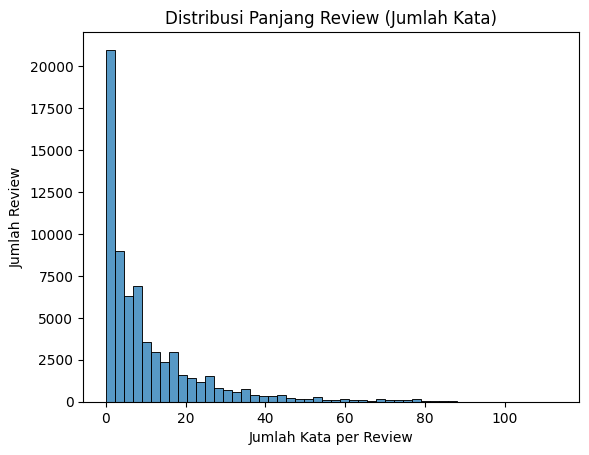

In [23]:
df_text["review_length"] = df_text["clean_text"].fillna("").str.split().apply(len)

sns.histplot(df_text["review_length"], bins=50)
plt.title("Distribusi Panjang Review (Jumlah Kata)")
plt.xlabel("Jumlah Kata per Review")
plt.ylabel("Jumlah Review")
plt.show()